# Outlier Detection Techniques with Python - Extended

by Emil Vassev

April 3, 2022 - April 13, 2023
<br><br>
Copyright (C) 2022-2023 - All rights reserved, do not copy or distribute without permission of the author.
***

<span style="color:blue">Welcome to <b>Outlier Detection Techniques</b>, an interactive lecture designed to teach you not only how to recognize various techniques but also how to implement them correctly. This lecture provides both theoretical and practical knowledge.</span>

## Definition of Outlier
"<i>In statistics, an outlier is a data point that differs significantly from other observations. An outlier may be due to variability in the measurement or it may indicate experimental error; the latter are sometimes excluded from the data set. An outlier can cause serious problems in statistical analyses.</i>"<br> 
Wikipedia

## Algorithms for Detecting Outliers
Four algorithms for detecting outliers are presented in this notebook:
<li>Enhanced Dixon Q</li>
<li>Mean & Standard Deviation</li>
<li>Isolation Forest</li>
<li>Boxplots Method</li>
<li>DbScan Clustering</li>

These algorithms are meant to work individually on numerical datasets. However, we can combine these algorithms to produce a joint result based on the individual performance of all of the executed algorithms. 

Let's set the target series of numbers - we are going to detect outliers among these numbers.

In [20]:
series = [100.625,96,122.873307,125.918466,126.5132685,87.640727,91.300919,
          100.6596,119.999811,116.48158,117.9620459,118.7118,121.562339,
          146.902942,141.993982,143.9881,142.135173,123.531172,133.782315,
          126.077418,130.4194537,108.123033,113.338919,106.6014,109.593951,
          126.97778,126.550827,128.7285245,130.6084,130.799433,100.340734,
          106.584198,197.4606,79.782605,167.574109,169.114286,159.2281,
          77.141509,75.671004,110.84316,112.30969,117.942093,63,65,60,
          130.703856,119.597655,141.648019,145.018004,142.8685393,145.6221,
          145.503622,97.600952,92,103.824548,123.521852,112.409556,110.995964,
          122.25,94.931864,104.851577,108.4738,134.262473,99.746662,99.8667,
          76.813091,72.5126,117.665167,120.103798,121.5737367,118.1471,
          126.588321,142.899425,136.782077,115.963214,124.339492,156.476319,
          169.429444,172.353,164.957759,63,64,40,111.977501,114.672941,
          118.0479,115.514796,105.948,88.050064,111.848821,108.69286,
          108.056866,110.125964,97.1435,110.399885,126.046539,125.154034,
          128.575127]

In [21]:
import pandas as pd

df = pd.DataFrame({'test':series})

df.describe()

,test
count,98.000000
mean,116.713784
std,26.780257
min,40.000000
25%,104.081305
50%,117.952069
75%,129.996721
max,197.460600


<AxesSubplot:>

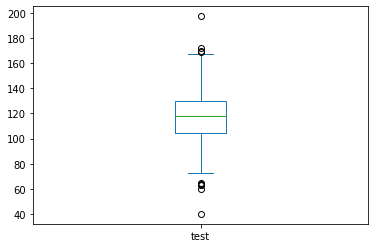

In [22]:
df['test'].plot.box()

## Dixon Q Outlier Detector - Enhanced Dixon Q Test
author's implementation by Emil Vassev
***

Dixon Q Test is an outlier detection test that usually operates on small, normally distributed, datasets. Small datasets are usually defined as somewhere between 3 and 7 items.

### New Enhanced Version of Dixon Q Outlier Test
The implementation of new Enhanced Dixon Q Test for Outliers was motivated by a few important reasons:  
<br>
The widely spread implementations of this outlier detection test:
<li>use critical values with 3 decimal places, thus having an impact on the algorithm accuracy</li>
<li>are unable to handle data sets larger than 30 samples</li>
<li>are unable to handle some cases with obvious outliers</li> 
<li>are often wrongly implemented</li>

### New Critical Values
Any Dixon Q Test is using a table of critical values (or <b>Q Table</b>) used to discover outliers. As part of the R&D of the new Enhanced Dixon Q Test, a computation of new critical values for Dixon discordance tests has been done: 1) initially, by using <i>Monte Carlo simulations</i>; and then 2) by generating missing values through a standard deviation technique. With this new <b>Q Table</b>, the new Enhanced Dixon Q Test is able to: 
<li>process data sets of up to 100 samples</li>
<li>provide a full spectrum of levels of confidence varying from 70% up to 99.5%</li> 

### Implementation of Enhanced Dixon Q Test

In [23]:
"""
Enhanced Dixon Q Test

@author: Emil Vassev
"""

from scipy.stats import shapiro

"""
 *
 * This class implements an enhanced version of DixonQ Test.
 * Provides a set of encoded critical values - up to 100.
 * The encoded critical values are used as a basis to generate critical values for other alphas (levels of confidence).
 * Both encoded and generated critical values are used to produce a result of maximum accuracy when identifying outliers. 
 *  
""" 
class DixonQEnhanced:
    
    criticalValues = {}


    """
     * DixonQEnhanced constructor
    """ 
    def __init__(self):
        self.buildCriticalValues()


    """
     * Builds a dictionary of critical values grouped by alpha  
    """
    def buildCriticalValues(self):
        
        """
         * the critical values are grouped by an alpha key
         * alpha is the probability of incorrectly rejecting the suspected outlier
        """    
        #encoded critical values for alpha = 0.3 (0.7% level of confidence)
        self.criticalValues[0.30] = [0,0,
                                     0.6836,0.4704,0.3730,0.3173,0.2811,0.2550,0.2361,0.2208,
                                     0.2086,0.1983,0.1898,0.1826,0.1764,0.1707,0.1656,0.1613,
                                     0.1572,0.1535,0.1504,0.1474,0.1446,0.1420,0.1397,0.1376,
                                     0.1355,0.1335,0.1318,0.1300,0.1283,0.1268,0.1255,0.1240,
                                     0.1227,0.1215,0.1202,0.1192,0.1181,0.1169,0.1160,0.1153,
                                     0.1141,0.1134,0.1124,0.1116,0.1108,0.1102,0.1093,0.1087,
                                     0.1079,0.1071,0.1067,0.1060,0.1052,0.1047,0.1041,0.1036,
                                     0.1030,0.1024,0.1019,0.1014,0.1009,0.1004,0.1000,0.0997,
                                     0.0991,0.0987,0.0982,0.0979,0.0974,0.0970,0.0967,0.0961,
                                     0.0960,0.0955,0.0952,0.0948,0.0943,0.0939,0.0937,0.0935,
                                     0.0930,0.0928,0.0925,0.0921,0.0918,0.0915,0.0913,0.0910,
                                     0.0906,0.0903,0.0902,0.0899,0.0896,0.0894,0.0892,0.0890,
                                     0.0887,0.0885]
        
        #encoded critical values for alpha = 0.2 (0.8% level of confidence)
        self.criticalValues[0.20] = [0,0,
                                     0.7808,0.5603,0.4508,0.3868,0.3444,0.3138,0.2915,0.2735,
                                     0.2586,0.2467,0.2366,0.2280,0.2202,0.2137,0.2077,0.2023,
                                     0.1973,0.1929,0.1890,0.1854,0.1820,0.1790,0.1761,0.1735,
                                     0.1710,0.1687,0.1664,0.1645,0.1624,0.1604,0.1590,0.1571,
                                     0.1555,0.1540,0.1525,0.1512,0.1499,0.1484,0.1472,0.1462,
                                     0.1449,0.1441,0.1430,0.1418,0.1408,0.1400,0.1390,0.1381,
                                     0.1374,0.1365,0.1357,0.1349,0.1340,0.1334,0.1326,0.1320,
                                     0.1312,0.1304,0.1299,0.1294,0.1286,0.1281,0.1275,0.1272,
                                     0.1264,0.1260,0.1254,0.1249,0.1243,0.1238,0.1234,0.1228,
                                     0.1225,0.1221,0.1217,0.1212,0.1205,0.1201,0.1198,0.1195,
                                     0.1189,0.1187,0.1182,0.1178,0.1174,0.1171,0.1167,0.1165,
                                     0.1160,0.1156,0.1154,0.1151,0.1147,0.1144,0.1141,0.1138,
                                     0.1134,0.1131]        

        #encoded critical values for alpha = 0.1 (0.9% level of confidence)
        self.criticalValues[0.10] = [0,0,
                                     0.8850,0.6789,0.5578,0.4840,0.4340,0.3979,0.3704,0.3492,
                                     0.3312,0.3170,0.3045,0.2938,0.2848,0.2765,0.2691,0.2626,
                                     0.2564,0.2511,0.2460,0.2415,0.2377,0.2337,0.2303,0.2269,
                                     0.2237,0.2208,0.2182,0.2155,0.2132,0.2110,0.2088,0.2066,
                                     0.2045,0.2026,0.2008,0.1993,0.1974,0.1958,0.1944,0.1930,
                                     0.1915,0.1902,0.1890,0.1875,0.1865,0.1850,0.1839,0.1829,
                                     0.1819,0.1808,0.1797,0.1788,0.1777,0.1768,0.1759,0.1752,
                                     0.1741,0.1733,0.1726,0.1717,0.1707,0.1703,0.1694,0.1689,
                                     0.1679,0.1674,0.1667,0.1660,0.1652,0.1648,0.1641,0.1635,
                                     0.1631,0.1626,0.1620,0.1613,0.1605,0.1601,0.1596,0.1594,
                                     0.1586,0.1583,0.1576,0.1573,0.1567,0.1563,0.1557,0.1554,
                                     0.1547,0.1544,0.1540,0.1537,0.1532,0.1528,0.1524,0.1521,
                                     0.1516,0.1512]        

        #encoded critical values for alpha = 0.05 (0.95% level of confidence)
        self.criticalValues[0.05] = [0,0,
                                     0.9411,0.7651,0.6423,0.5624,0.5077,0.4673,0.4363,0.4122,
                                     0.3922,0.3755,0.3615,0.3496,0.3389,0.3293,0.3208,0.3135,
                                     0.3068,0.3005,0.2947,0.2895,0.2851,0.2804,0.2763,0.2725,
                                     0.2686,0.2655,0.2622,0.2594,0.2567,0.2541,0.2513,0.2488,
                                     0.2467,0.2445,0.2423,0.2408,0.2383,0.2366,0.2350,0.2334,
                                     0.2319,0.2302,0.2288,0.2273,0.2257,0.2241,0.2228,0.2216,
                                     0.2206,0.2191,0.2182,0.2169,0.2160,0.2145,0.2135,0.2126,
                                     0.2116,0.2106,0.2095,0.2085,0.2075,0.2070,0.2057,0.2053,
                                     0.2045,0.2037,0.2030,0.2020,0.2013,0.2005,0.1996,0.1990,
                                     0.1984,0.1980,0.1973,0.1964,0.1955,0.1950,0.1943,0.1940,
                                     0.1934,0.1927,0.1922,0.1918,0.1909,0.1906,0.1899,0.1896,
                                     0.1887,0.1885,0.1881,0.1876,0.1869,0.1865,0.1860,0.1856,
                                     0.1851,0.1846]        

        #encoded critical values for alpha = 0.02 (0.98% level of confidence)
        self.criticalValues[0.02] = [0,0,
                                     0.9763,0.8457,0.7291,0.6458,0.5864,0.5432,0.5091,0.4813,
                                     0.4591,0.4405,0.4250,0.4118,0.3991,0.3883,0.3792,0.3711,
                                     0.3630,0.3562,0.3495,0.3439,0.3384,0.3328,0.3287,0.3242,
                                     0.3202,0.3163,0.3127,0.3093,0.3060,0.3036,0.2999,0.2973,
                                     0.2948,0.2921,0.2898,0.2879,0.2853,0.2836,0.2815,0.2794,
                                     0.2778,0.2758,0.2744,0.2726,0.2711,0.2690,0.2676,0.2662,
                                     0.2651,0.2632,0.2620,0.2606,0.2595,0.2582,0.2570,0.2555,
                                     0.2545,0.2531,0.2522,0.2510,0.2500,0.2493,0.2480,0.2472,
                                     0.2466,0.2457,0.2445,0.2436,0.2429,0.2420,0.2409,0.2402,
                                     0.2398,0.2387,0.2382,0.2372,0.2365,0.2360,0.2349,0.2345,
                                     0.2337,0.2330,0.2322,0.2319,0.2309,0.2304,0.2298,0.2294,
                                     0.2285,0.2279,0.2272,0.2272,0.2259,0.2257,0.2251,0.2247,
                                     0.2240,0.2234]        

        #encoded critical values for alpha = 0.01 (0.99% level of confidence)
        self.criticalValues[0.01] = [0,0,
                                     0.9881,0.8886,0.7819,0.6987,0.6371,0.5914,0.5554,0.5260,
                                     0.5028,0.4831,0.4664,0.4517,0.4385,0.4268,0.4166,0.4081,
                                     0.4002,0.3922,0.3854,0.3789,0.3740,0.3674,0.3625,0.3583,
                                     0.3543,0.3499,0.3460,0.3425,0.3390,0.3357,0.3323,0.3294,
                                     0.3266,0.3238,0.3213,0.3187,0.3163,0.3141,0.3124,0.3102,
                                     0.3081,0.3061,0.3050,0.3028,0.3009,0.2991,0.2972,0.2960,
                                     0.2941,0.2927,0.2920,0.2899,0.2880,0.2873,0.2859,0.2845,
                                     0.2828,0.2816,0.2812,0.2792,0.2784,0.2775,0.2766,0.2754,
                                     0.2742,0.2735,0.2724,0.2714,0.2709,0.2696,0.2682,0.2677,
                                     0.2667,0.2662,0.2656,0.2646,0.2637,0.2633,0.2621,0.2614,
                                     0.2608,0.2599,0.2588,0.2584,0.2573,0.2568,0.2566,0.2558,
                                     0.2548,0.2543,0.2539,0.2535,0.2524,0.2521,0.2512,0.2513,
                                     0.2499,0.2498]   
        
        #encoded critical values for alpha = 0.005 (0.995% level of confidence)
        self.criticalValues[0.005] = [0,0,
                                     0.9940,0.9201,0.8234,0.7437,0.6809,0.6336,0.5952,0.5668,
                                     0.5416,0.5208,0.5034,0.4869,0.4739,0.4614,0.4504,0.4423,
                                     0.4333,0.4247,0.4173,0.4109,0.4051,0.3986,0.3935,0.3889,
                                     0.3843,0.3801,0.3762,0.3718,0.3685,0.3646,0.3610,0.3583,
                                     0.3548,0.3522,0.3498,0.3465,0.3443,0.3415,0.3400,0.3377,
                                     0.3353,0.3332,0.3325,0.3298,0.3279,0.3256,0.3235,0.3225,
                                     0.3204,0.3191,0.3177,0.3163,0.3140,0.3136,0.3118,0.3098,
                                     0.3089,0.3075,0.3071,0.3061,0.3041,0.3031,0.3025,0.3006,
                                     0.2996,0.2990,0.2983,0.2968,0.2959,0.2946,0.2934,0.2932,
                                     0.2922,0.2912,0.2905,0.2897,0.2885,0.2876,0.2870,0.2859,
                                     0.2852,0.2844,0.2836,0.2832,0.2818,0.2811,0.2808,0.2798,
                                     0.2790,0.2788,0.2784,0.2775,0.2766,0.2764,0.2755,0.2751,
                                     0.2738,0.2737]   

        """
         * Generates all critical values by using the encoded values as a basis.
         * Values are genereated between any two existing pairs of alphas.
        """ 
        #generate range alpha 0.2 - 0.1
        self.generateCriticalValuesForAlphaPair(0.2,0.1)

        #generate range alpha 0.3 - 0.2
        self.generateCriticalValuesForAlphaPair(0.3,0.2)

        #generate range alpha 0.10 - 0.05
        self.generateCriticalValuesForAlphaPair(0.10,0.05)

        #generate range alpha 0.05 - 0.02
        self.generateCriticalValuesForAlphaPair(0.05,0.02)
        
        
    """
     * Generates the missing series of critical values between two alphas with a step = 0.01
     * constraint: alpha1 > alpha2
    """ 
    def generateCriticalValuesForAlphaPair(self, alpha1, alpha2):
        
        if alpha1 < alpha2:
            raise Exception('The value of alpha1 is less than alpha2.')
            
        nInsideAlphas = int(round((alpha1 - alpha2)/(0.01)) - 1)
        
        insideAlphas = []
        
        step = 0.01
        for i in range(1,nInsideAlphas+1):
            newAlpha = round(alpha2 + i*step,2)
            insideAlphas.append(newAlpha) 
        
        for index in range(2,100):

            rangeLeft = self.criticalValues[alpha1][index]
            rangeRight = self.criticalValues[alpha2][index]
        
            distance = round(((rangeRight - rangeLeft)/(nInsideAlphas+1)),4)
            
            currentValue = self.criticalValues[alpha1][index]
            
            for insideAlpha in insideAlphas:
                
                if insideAlpha not in self.criticalValues.keys():
                    self.criticalValues[insideAlpha] = []
                    self.criticalValues[insideAlpha].append(0)
                    self.criticalValues[insideAlpha].append(0)
                
                currentValue += distance
                
                currentValue = round(currentValue,4)
                
                self.criticalValues[insideAlpha].append(currentValue)      

### Correct Implementation
Every implementation of the Dixon Q Test is bounded to the computation of a Q exponential value by using the original formula (called R10), or simply the “Q” formula:
<br>
![title](images/r10.png)
<br>
Where:
<li>$x_{k}$ is the number that is under evaluation, i.e., an eventual candidate for outlier</li>   
<li>$x_{(k±1})$ is the number nearest to $x_{k}$, i.e., the number of the left or the right side</li>
<li>$x_{1}$ is the smallest value of the series</li>
<li>$x_{n}$ is the largest value of the series</li>

Once computed the $Q_{exp}$ value, the latter is compared to the critical value (from the Q Table) that corresponds to the sample size. Here, for a sample size of 7 numbers (n=7), the 7th Q critical value in the Q Table is picked up. Note that the Q critical value is picked up in multiple iterations where each iteration examines a different level of confidence. Finally, $Q_{exp}$ is compared with the Q critical value and if $Q_{exp}$ is greater than the Q critical value, the point is considered to be an outlier.

Note that in the Internet space, there are many wrong interpretations of the R10 formula, i.e.:
<br>
![title](images/r10_wrong.png)
<br>
The Enhanced Dixon Q Test is strictly bounded to the correct interpretation of R10 and in this implementation $Q_{exp}$ is compared against the new Q Table. 

In [24]:
class DixonQEnhanced(DixonQEnhanced):    
    """
     * Finds the next element in a series of elements
    """
    def findNextInSeries(self, number, series):
        
        result = -1
        
        try:
            index = series.index(number)
        except ValueError as e:
            raise Exception('The number has not been found in the series.')

        if index == (len(series) - 1):
            result = index - 1
        else:
            result = index + 1

        return result

        
    """
     * Finds the previous element in a series of elements
    """
    def findPreviousInSeries(self, number, series):
        
        result = -1
        
        try:
            index = series.index(number)
        except ValueError as e:
            raise Exception('The number has not been found in the series.')

        if index == 0:
            result = index + 1
        else:
            result = index - 1

        return result

        
    """
     * Identifies if a number is outlier within a series and for particular alpha
    """
    def isOutlier(self, number, series, alpha):
                
        qCritical = 0.0
        
        qExpDivisor = series[len(series)-1] - series[0]
        
        if qExpDivisor == 0:
            return False
        
        if len(series) > 100:
            return False

        nextNumberGap = abs(number - series[self.findNextInSeries(number,series)])
        prevNumberGap = abs(number - series[self.findPreviousInSeries(number,series)])
        if prevNumberGap < nextNumberGap:
            closestNumberGap = prevNumberGap
        else:
            closestNumberGap = nextNumberGap
            
        qExp = closestNumberGap/qExpDivisor
        
        if alpha in self.criticalValues.keys():
            qCritical = self.criticalValues[alpha][len(series)-1]
            
        if qExp > qCritical:
            return True
        else:
            return False
        

    """
     * Identifies all the outliers within a series
     * Uses the isOutlier method
    """
    def findOutliers(self, series):
        
        outliers = {}
        
        for alpha in self.criticalValues.keys():            
            for number in series:
                if self.isOutlier(number,series,alpha):
                    if number in outliers:
                        if outliers[number] < (1-alpha):
                            outliers[number] = (1-alpha)
                    else:
                        outliers[number] = (1-alpha)
                        
        return outliers

### The Normal Distribution Requirement
The Dixon Q Test is based on the statistical distribution of "sub-range ratios" of ordered data samples, drawn from the same normal population. Hence, a normal (Gaussian) distribution of data is assumed whenever this test is applied. This basically means that the Dixon Q Test should not be run on a series of numbers, which are not distributed normally. A normal distribution, sometimes called the bell curve, is a distribution where the corresponding curve is symmetrical, i.e., half of the data will fall to the left of the mean and half will fall to the right (see Figure below).
<br>
![title](images/gaussian_distribution.png)
<br>
As part of its implementation, the Enhanced Dixon Q Test runs a Shapiro-Wilk Test for normality on each series that is to be processed for outliers. Note that the Shapiro-Wilk Test for normality is one of three general normality tests designed to detect departures from normality.  In general, the test rejects the hypothesis of normality when the result (a special p-value) is less than or equal to 0.05. Failing the normality test allows you to state with 95% confidence that the data does not fit in a normal distribution.  Passing the normality test only allows us to state that no significant departure from normality has been detected. 

The implementation of the Shapiro-Wilk Test is based on the following formula: 
<br>
![title](images/shapiro_wilk.png)
<br>
where $x_{(1)}$ ≤ $x_{(2)}$ ≤ ••• ≤ $x_{(n)}$ are the ordered values of a sample $x_{1}$, $x_{2}$, ..., $x_{n}$, and $a_{i}$ are tabulated coefficients. A lower tail of $W$ indicates non-normality.

When we use the Enhanced Dixon Q Test for detecting outliers, we work on a finite set of numbers, which is generated by a business process that is a subject to upsets and changes over time, and therefore, it might not have a normal histogram. As a result, the Enhanced Dixon Q Test will produce approximate evaluation that might not be satisfactory. Hence, an important step in data analysis is to inspect the distribution of the observations. Rather than assuming a normal distribution and estimating the mean and variance, we shall estimate the complete distribution of the data.

To conform with this requirement, the Enhanced Dixon Q Test, checks if the series of numbers is normally distributed and issues a warning if it is not.

In [25]:
class DixonQEnhanced(DixonQEnhanced):    
    """
     * Checks if the data set is normally distributed;
     * running DixonQ Test on different distributions will lead to erroneous results
     *
     * Runs a Shapiro-Wilk test to check if the series is Gaussian
    """    
    def checkForNormalDisribution(self, series):
        
        print("Shapiro-Wilk: Running Shapiro-Wilk test ....")
        
        stat, p = shapiro(series)
        
        alpha = 0.05
        
        if p > alpha:       
            print("Shapiro-Wilk: Series looks Gaussian")
            print("")
            return True

        else:
            print("Shapiro-Wilk: Series does not look Gaussian")
            print("")
            return False
        
        
    """
     * Executes DixonQ Test on the provided series of numbers;
     * DixonQ Test is executed for all available alpha keys (levels of confidence)
    """ 
    def execute(self, series):
        
        outliers = {}

        series.sort(reverse=False)
        
        if not self.checkForNormalDisribution(series):
            print("DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.")

        outliers = self.findOutliers(series)
        
        return outliers        

### Execution of Enhanced Dixon Q Test

In [26]:
"""
 * Executes the DixonQ Test
"""
dixonQEnhanced = DixonQEnhanced()
outliers_dixon_q = dixonQEnhanced.execute(series)

print(outliers_dixon_q)

outliers_dixon_q = list(outliers_dixon_q.keys())

print(outliers_dixon_q)

Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series looks Gaussian

{40: 0.89, 197.4606: 0.94}
[40, 197.4606]


## Mean & Standard Deviation Method
author's implementation by Emil Vassev
***

Standard deviation is a metric of variance, i.e., it shows how much the individual data points are spread out from the mean as shown by the Figure below (Wikipedia).
<br>
![standard deviation](images/standard_deviation_small.png)
<br>
In this outlier detection method, the mean and standard deviation of the numbers are calculated and compared. If a value is a certain number of standard deviations away from the mean, then that data point is identified as an outlier. The specified number of standard deviations is considered to be a <b>threshold</b>. The default threshold value is 3 (three).

### Implementation of Mean & Standard Deviation Method
As part of this exercise, a number of experiments have been conducted to calibrate the Mean & Standard Deviation algorithm’s threshold. Experiments have been done with threshold values of 1.5, 1.75, 2, 2.5, and 3. The conclusion is that when running this algorithm in conjunction with the Enhanced Dixon Q algorithm, the 2.5 threshold appears to be the one that synchronizes both algorithms very well.

In [27]:
import numpy as np
#import matplotlib.pyplot as plt


"""
 * This class implements the Standard Deviation Method for detecting outliers
"""
class StandardDeviationMethod:
    
    
    methodName = "StandardDeviationMethod"
    
    upperLimit = 0.0
    lowerLimit = 0.0
    seriesStd = 0.0
    seriesMean = 0.0
    

    """
     *
    """ 
    def __init__(self):
        
        pass
    
    
    """
     *
    """ 
    def getMethodName(self):
        return "Standard Deviation Method"

        
    """
     * Function to detect outliers on one-dimentional datasets
    """
    def execute(self, series):
        
        outliers = []
    
        # set upper and lower limits to 3 times the standard deviation
        seriesStd = np.std(series)
        seriesMean = np.mean(series)
        #anomalyCutOff = seriesStd * 3
        #anomalyCutOff = seriesStd * 2
        #anomalyCutOff = seriesStd * 1.5
        #anomalyCutOff = seriesStd * 1.75
        anomalyCutOff = seriesStd * 2.5
        
        lowerLimit  = seriesMean - anomalyCutOff 
        upperLimit = seriesMean + anomalyCutOff
        
        #print(lowerLimit)
        
        self.upperLimit = upperLimit
        self.lowerLimit = lowerLimit
        self.seriesStd = seriesStd
        self.seriesMean = seriesMean

        # generate outliers
        for outlier in series:
            if outlier > upperLimit or outlier < lowerLimit:
                outliers.append(outlier)
                
        return outliers


### Execution of Mean & Standard Deviation Method

In [28]:
standardDeviationMethod = StandardDeviationMethod()

outliers_standard_deviation = standardDeviationMethod.execute(series)

print(outliers_standard_deviation)

[40, 197.4606]


## Isolation Forest Method
***

The Isolation Forest algorithm explicitly identifies anomalies instead of profiling normal data points. This algorithm is a tree ensemble method that is built on the basis of decision trees. In these trees, partitions are created by first randomly selecting a feature and then selecting a random split value between the minimum and maximum value of the selected feature.
The idea of identifying a normal vs. abnormal observation can be observed in the following Figure. A normal point (on the left) requires more partitions to be identified than an abnormal point (on the right).
<br>
![title](images/isolation_forest.png)
<br>
As with other outlier detection methods, an anomaly score is required for decision making. In the case of Isolation Forest, it is defined as:
<br>
![title](images/isolation_forest_alg.png)
<br>
where $h(x)$ is the path length of observation $x$, $c(n)$ is the average path length of unsuccessful search in a Binary Search Tree and $n$ is the number of external nodes. 

Each observation is given an anomaly score and a decision is made based on the following rules:
<li>a score close to 1 indicates anomalies</li>
<li>score much smaller than 0.5 indicates normal observations</li>
<li>if all scores are close to 0.5 then the entire sample does not seem to have clearly distinct anomalies</li>

### Implementation of Isolation Forest Method
As part of this exercise, the Isolation Forest algorithm has been implemented and run by using the <i>sklearn.ensemble</i> package. Although this algorithm copes well with the human perception of outliers, e.g., numbers that fall outside the dense area, it has appeared to be quite slow. This low speed performance is most probably due to the partitioning and costly estimation of the path lengths.

In [29]:
from sklearn.ensemble import IsolationForest
import pandas as pd

"""
 * This class implements the Isolation Forest Method for detecting outliers
"""
class IsolationForestMethod:

    """
     *
    """ 
    def __init__(self):       
        pass

    
    """
     *
    """ 
    def checkAllElementsEqual(self, series):
        return len(set(series)) <= 1
    

    """
     * Function to detect outliers on one-dimentional datasets
    """
    def execute(self, series):
        outliers = []
        
        if not self.checkAllElementsEqual(series):          
            df = pd.DataFrame({'temp':series})
            clf = IsolationForest().fit(df['temp'].values.reshape(-1, 1)) 
            outliersInds = clf.predict(df['temp'].values.reshape(-1, 1))
            
            for indx in range(0, len(outliersInds)):
                if outliersInds[indx] == -1:
                    outliers.append(series[indx])    
                    
        return outliers

### Execution of Isolation Forest Method

In [30]:
isolationForest = IsolationForestMethod()

outliers_isolation_forest = isolationForest.execute(series)

print(outliers_isolation_forest)

[40, 60, 63, 63, 64, 65, 72.5126, 75.671004, 76.813091, 77.141509, 79.782605, 87.640727, 88.050064, 91.300919, 92, 136.782077, 146.902942, 156.476319, 159.2281, 164.957759, 167.574109, 169.114286, 169.429444, 172.353, 197.4606]


## Calculate the Joint Result of the Three Methods

In [31]:
def findCommonOutliers(outliers_1, outliers_2, outliers_3):
    # converting the arrays into sets
    set_outliers_1 = set(outliers_1)
    set_outliers_2 = set(outliers_2)
    set_outliers_3 = set(outliers_3)
      
    # calculates intersection of sets on set_outliers_1 and set_outliers_2
    set_intersec_1 = set_outliers_1.intersection(set_outliers_2)       
      
    # calculates intersection of sets on set1 and s3
    result_set = set_intersec_1.intersection(set_outliers_3)
      
    # converts resulting set to list
    final_list = list(result_set)
    
    return final_list

In [32]:
joint_result = findCommonOutliers(outliers_dixon_q, outliers_standard_deviation, outliers_isolation_forest)
print(joint_result)

[40, 197.4606]


## Boxplots Method
***

A boxplot is a standardized way of displaying the distribution of data based on a five number summary: 
* minimum 
* first quartile (Q1) 
* median 
* third quartile (Q3) 
* maximum

Basically, a boxplot shows the outliers and what their values are. Moreover, it also show if the data is symmetrical, how tightly it is grouped, and if and how it is skewed.

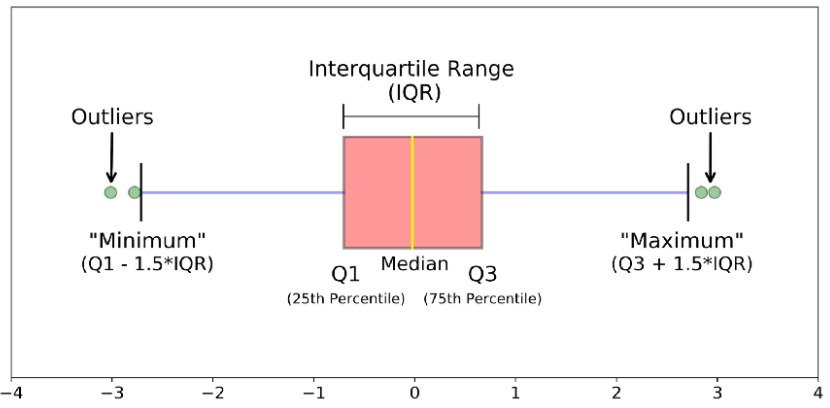

Boxplot’s features:
* median (Q2/50th Percentile) - the middle value of the dataset;
* first quartile (Q1/25th Percentile) - the middle number between the smallest number (not the “minimum”) and the median of the dataset;
* third quartile (Q3/75th Percentile) - the middle value between the median and the highest value (not the “maximum”) of the dataset;
* interquartile range (IQR) - 25th to the 75th percentile;
* whiskers - (shown in blue)
* outliers - (shown as green circles)
* “maximum”- Q3 + 1.5*IQR
* “minimum”- Q1 -1.5*IQR

### Implementation of Boxplots Method

The implementation of Boxplots, presented here, is based on the **matplotlib** library. Although this approach is a bit tedious, it gives us a greater level of control. 

The **matplotlib** library does not estimate a normal distribution and calculates the quartiles from the estimated distribution parameters. 

The median and the quartiles are calculated directly from the data. 

Although quite accurate, the Boxplots algorithm has appeared to be extremely slow when processing larger numbers of quotes. This low performance is most probably due to the plotting feature.

In [33]:
import seaborn as sns
from matplotlib.cbook import boxplot_stats

In [36]:
"""
 * This class implements the Boxplots Method for detecting outliers
"""
class BoxPlotsMethod:
        
    methodName = "BoxPlotsMethod"
    
    
    """
     *
    """ 
    def __init__(self):
        pass


    """
     *
    """ 
    def getMethodName(self):
        return "Boxplots Method"

        
    """
     * Function to detect outliers on one-dimentional datasets
    """
    def execute(self, series):
        outliers = []

        ax = sns.boxplot(data=series, whis=2.5)
        
        outliers = [y for stat in boxplot_stats(series) for y in stat['fliers']]

        return outliers

### Execution of Boxplots Method

[40.0, 60.0, 63.0, 63.0, 64.0, 65.0, 169.114286, 169.429444, 172.353, 197.4606]


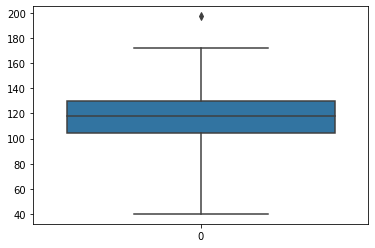

In [37]:
boxPlots = BoxPlotsMethod()

outliers_boxPlots = boxPlots.execute(series)

print(outliers_boxPlots)

## DBSCAN Clustering Method
***

The DBSCAN (or Density-Based Spatial Clustering of Applications with Noise) Clustering algorithm is a density-based clustering technique for detecting outliers. The main idea behind DBSCAN is that a point belongs to a cluster if it is close to many points from that cluster. There are two
key features of DBSCAN:
* *eps* - the distance that specifies the neighborhoods - two points are considered to be neighbors if the distance between them is less than or equal to eps
* *minPts* - the minimum number of data points to define a cluster

Based on these two features, points are classified as:
* *core point* - a point is a core point if there are at least *minPts* number of points (including the point itself) in its surrounding area with radius *eps*
* *border point* - a point is a border point if it is reachable from a core point and there are less than *minPts* number of points within its surrounding area
* *outlier* - a point is an outlier if it is not a core point and not reachable from any core point

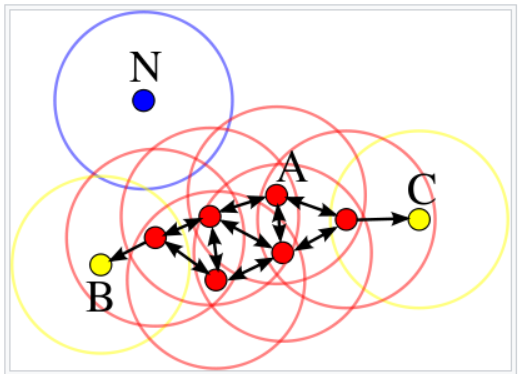

Considering the DBSCAN example shown above:
* *minPts* is 4 
* red points (the A points) are core points because there are at least 4 points within their surrounding area with radius *eps* - surrounding areas are shown with circles
* yellow points are border points because they are reachable from a core point and have less than 4 points within their neighborhood - reachable means being in the surrounding area of a core
point
* points B and C have two points (including the point itself) within their neighborhood (i.e. the surrounding area with a radius of eps)
* point N is an outlier - it is not a core point and cannot be reached from a core point

### Implementation of DBSCAN Clustering Method

The implementation of DBSCAN Clustering, presented here, is based on the *sklearn* library.

In [38]:
from sklearn.cluster import DBSCAN
import pandas as pd

In [39]:
"""
 * This class implements the DBScan Clustering Method for detecting outliers
"""
class DBScanClusteringMethod:

    
    methodName = "DBScanClusteringMethod"


    """
     *
    """ 
    def __init__(self):
        
        pass


    """
     *
    """ 
    def checkAllElementsEqual(self, series):
        return len(set(series)) <= 1


    """
     *
    """ 
    def getMethodName(self):
        return "DBScan Clustering Method"

        
    """
     * Function to detect outliers on one-dimentional datasets
    """
    def execute(self, series):
        outliers = []

        if not self.checkAllElementsEqual(series):
            
            df = pd.DataFrame({'temp':series})
            outliersDetection = DBSCAN(min_samples = 2, eps = 0.5)
            outliersInds = outliersDetection.fit_predict(df['temp'].values.reshape(-1, 1))
            
            for indx in range(0, len(outliersInds)):

                if outliersInds[indx] == -1:
                    outliers.append(series[indx])    

        return outliers

### Execution of DBSCAN Clustering Method

In [40]:
dbscan = DBScanClusteringMethod()

outliers_dbscan = dbscan.execute(series)

print(outliers_dbscan)

[40, 60, 64, 65, 72.5126, 75.671004, 79.782605, 91.300919, 92, 94.931864, 96, 103.824548, 104.851577, 105.948, 109.593951, 113.338919, 114.672941, 116.48158, 118.7118, 122.25, 122.873307, 124.339492, 125.154034, 136.782077, 143.9881, 146.902942, 156.476319, 159.2281, 164.957759, 167.574109, 172.353, 197.4606]
